# keras

세가지중 한가지를 백앤드로 삼는다
#backend - Tensorflow: 우리는 얘를 백앤드로 삼는다_ 이것을 wrapper로 싸놓음
         - CNTK: 마이크로 소프트에서 만든것
         - THEANO: 행렬연산을 만들기위해 
         
[TE델만드는 방법]
 - Constant
 - VAIABLE:가중치 공간
 - PLACE HOLDER: 데이터 주입
    - variable의 가중치는 placeholder의 데이터에 곱해짐 
         
 for문 epoch batchsize
 
 이 순서 
 행렬연산  => loss function => activation => optimizer  이 것을 통해 fit(scikit)으로 
 
 
 이과정을 compile 로 tensorflow 을 변환시켜주어야함 
 
 
[KERAS는 layer 방식 ]

- KERAS는 출력차수만 지정해주면 된다. 왜냐하면 입력차수는 앞에서 계산한것을 그대로 받아 쓴다 
- 가중치를 지정하는 게 없다, 추가할게 있으면 ADD 함수로 추가만 해주면된다 
    - 이전방식에서 계산된게 다음것으로 자동으로 넘어감 (RETURN 받을 필요가 없다 )
- dense: 출력,입력차수를 넣어주면 가운데 차수를 자동으로 만들어줌_ variable을 선언할 필요가없고, initializer도 안해줘도됨
- 행렬연산에 필요한것들을 다 LAYER로 만들어놈
    - INPUT
    - DENSE
    - CNN
    - RNN
#순서
- 모델만들고 COMPILE :  텐서플로우 방식으로 바꿔줌
     - COMPILE 옵셥 
         - LOSS
         - ACTIVATION
         - OPTIMIZER

- ↓↓↓↓↓↓↓↓
- EVALUATE: TEST 데이터만 넣어주면 자동으로 
- ↓↓↓↓↓↓↓↓
- PREDICT: 실제 사용 데이터만 넣어주면됨 

## KERAS에서 모델을 만드는 3가지방법

[SEQUENTIAL]
- SINGLE INPUT , SINGLE OUTPUT

[FUNCTIONAL]
- MULTI INPUT, MULTI OUTPUT
-
[MODEL]
- 상속을 받아서, 원래 있는 모델 사용 



## 케라스로 작업하면 좋은점 
#SCIKIT하고 연결시켜놓음_ it means PIPE라인을 가지고 있음 ,
                        - GRID SEARCH CV를 이용해 하이퍼파라미터 자동튜닝
#결국 모든 모델은 CLASSIFIER  REGRESSOR 으로 나뉨


### transfer learning
- 처음부터 가중치를 학습하는건 오래걸린다 그래서 대표적인(같은 domain) 분야에서 pre training되어진 것을 사용> keras에서 application 으로 되어있음

- RNN
    - 10단계이상 진행하면 (시간적 순서를 가지고 진행) 연결이 되지않음(기울기 소실)
        - = > 그래서 나온게 LSTM 
    - GRU  회로가 3개_ lstm보다 속도가 빠르다  
        - forget회로
        - input회로
        - output 회로 
    -  sequence to sequence 는 효율이 좋지않아 나온데 attention 
        - attention은 지들끼리 들어오는 단어중 어떤것이 중요한지 학습
        - (가중치3개를 가지고) 중요한것 학습 
            - query
            - key
            - value
        - NMT _Neural machine translation (신경망 기계 번역)
            - attention , sequence to sequence 같이
        
        - VERT _bi directional 
             - transformer로 양방향으로 작동하도록?
             
### PRJ 할때 3가지 종류 
- IMAGE 전처리하는거 : OPEN CV
- SOUND 전처리 하는거 :LIBROSA
- TEXT 전처리하는거 : NLTK => GENSIM(EMBEDDING TOOL)
     -CORPUS :전처리는 되지않았지만 할수있도록 만들어진 FORM
     
     
     
#요새 가장 이슈되는거 : GAN(이미지처리) , VERT(텍스트 처리)
             
             
### callback 
콜백 함수를 만드는 이유는 모델 훈련시 통제를 할 수 있기 때문입니다.
콜백 함수가 없으면 좋던 싫든 훈련이 끝날때까지 아무 것도 제어 할 수가 없습니다.
콜백 함수는 베스트 가중치 선별 저장부터 모델 부적격시 자동 중단할 수 있습니다.
다양한 기능이 있으니 관련 자료를 찾아 보시고 원하는 세팅을 하십시요.

 
콜백함수
- TensorBoard() 를 사용합니다.
graph , image 사용을 합니다.
- log_dir 은 텐션보드 그래프를 저장할 디렉토리를 지정해 줍니다.
- EarlyStopping()
    - 학습중 평가시 모델 훈련 종료 시점을 정합니다.

- monitor 는 종료 시키기 위한 관찰대상을 의미합니다.
'val_loss', 'val_acc' 등이 있습니다

- patience 는 모니터 대상의 평가가 지정한 횟수 만큼 나아지지 않으면 훈련을 종료합니다
    - monitor = 'val_acc' , patience = 5 이라면 검증데이터 
      정확도가 5 에포크만큼 나아지지 않으면 훈련을 종료합니다
- ModelCheckpoint()
- filepath 는 모델 저장 위치
- monitor 는 모델에 저장할 가중치 , 주로 'val_loss'사용
- save_best_only , 최상의 가중치만 기록여부 



출처: https://redapply.tistory.com/entry/Keras-Cat-Dog-분류-5-딥러닝-시작하기-콜백-함수 [Bigcat]


In [ ]:
#오늘 할거  기본이랑, 파라미터 튜닝하는 것 

# 회귀모델

In [1]:
from keras.models import Sequential #models 서브 패키지 
from keras.layers import Dense #layers에서 모델 구성
from sklearn.datasets import make_regression

#신경망에서는 정규화 하는 것이 좋다 
from sklearn .preprocessing import MinMaxScaler

#x = 100x2 y = 100개
X,y = make_regression(n_samples = 100,n_features=2, #변수2개 
                      noise =0.1,random_state=1)
#minmax 2개 만듬 : 왜냐하면 데이터가 가지고있는 값의 범위가가 다르기 때문
scalarX,scalarY = MinMaxScaler(),MinMaxScaler() 


scalarX.fit(X)
scalarY.fit(y.reshape(100,1)) #행으로 만드는 것
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1))

#keras model 만들기
#망의 선두에 x가 들어감  (= 100x2가 들어감)
model = Sequential()
#layer depth
#input : 100x2,  weight 2x4 ouput 100x4 =여기서 4를 지정한 것 
model.add(Dense(4,input_dim=2,activation ='relu'))

# input : 100x4 , weight : 4x4    ouput :100x4
model.add(Dense(4,activation = 'relu'))

#input : 100x4 weight  4x1  ouput100x1
#최종 출력이 1이면 예측 
model.add(Dense(1,activation = 'linear'))

#컴파일 하는 이유는 백앤드가 텐서플로우기 때문 
#그것을 wrapp해논것이 keras
#  예측일때 mse , 분류일 때 cross entropy  gan 일 때 KL-divergence(분포를 띄게해줌)

model.compile(loss = 'mse',optimizer = 'adam') #tensorflow 모델을 변환

model.fit(X,y,epochs=1000,verbose=0) # tensor에서의 2개의for문(epoch와 mini batch)

Xnew,a = make_regression(n_samples =3,n_features =2,noise =0.1,random_state=1)

Xnew = scalarX.transform(Xnew)

ynew = model.predict(Xnew)

for i in range(len(Xnew)):
    print('입력데이터=%s,예측결과=%s' %(Xnew[i],ynew[i]))
    


Using TensorFlow backend.
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_14\.conda\envs\tf_test\lib


입력데이터=[0.29466096 0.30317302],예측결과=[0.1722131]
입력데이터=[0.39445118 0.79390858],예측결과=[0.7463053]
입력데이터=[0.02884127 0.6208843 ],예측결과=[0.40482876]


# 분류
- 암인지 아닌지

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

numpy.random.seed(7)
dataset = numpy.loadtxt('pima.data',delimiter=',')
X = dataset[:,0:8] #데이터 변수가 8개 (독립변수) 
Y = dataset[:,8]  #종속변수 

 #kerner_initializer ='uniform', :초기화 방법 지정
model = Sequential()
# ?x8  8x12 = ?x12
model.add(Dense(12,input_dim = 8,kernel_initializer ='uniform',activation = 'relu'))
#?x12 12x8  = ?x8
model.add(Dense(8,kernel_initializer ='uniform',activation = 'relu'))
#?x8 8x1 = ?x1  분류
model.add(Dense(1,kernel_initializer ='uniform',activation = 'sigmoid')) #0.5
model.compile(loss= 'binary_crossentropy',optimizer = 'adam',
             metrics = ['accuracy']) # accuracy를 밑에서 불러오는거 

#데이터 분리 입력(train, test) :과적합
#train,validation,test

history=model.fit(X,Y,validation_split=0.33,epochs = 150,batch_size = 10)
scores = model.evaluate(X,Y)

#2번째  accuracy

print('\n%s:%.2f%%' %(model.metrics_names[1],scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 691us/step - loss: 0.6796 - accuracy: 0.6401 - val_loss: 0.6586 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 151us/step - loss: 0.6687 - accuracy: 0.6401 - val_loss: 0.6535 - val_accuracy: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 144us/step - loss: 0.6618 - accuracy: 0.6401 - val_loss: 0.6518 - val_accuracy: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 130us/step - loss: 0.6545 - accuracy: 0.6323 - val_loss: 0.6459 - val_accuracy: 0.6811
Epoch 5/150
514/514 [==============================] - 0s 118us/step - loss: 0.6459 - accuracy: 0.6420 - val_loss: 0.6364 - val_accuracy: 0.7008
Epoch 6/150
514/514 [==============================] - 0s 118us/step - loss: 0.6391 - accuracy: 0.6362 - val_loss: 0.6241 - val_accurac

514/514 [==============================] - 0s 122us/step - loss: 0.5312 - accuracy: 0.7374 - val_loss: 0.5532 - val_accuracy: 0.7441
Epoch 55/150
514/514 [==============================] - 0s 114us/step - loss: 0.5310 - accuracy: 0.7432 - val_loss: 0.5570 - val_accuracy: 0.7323
Epoch 56/150
514/514 [==============================] - 0s 109us/step - loss: 0.5398 - accuracy: 0.7354 - val_loss: 0.5617 - val_accuracy: 0.7283
Epoch 57/150
514/514 [==============================] - 0s 109us/step - loss: 0.5404 - accuracy: 0.7354 - val_loss: 0.5640 - val_accuracy: 0.7362
Epoch 58/150
514/514 [==============================] - 0s 128us/step - loss: 0.5309 - accuracy: 0.7237 - val_loss: 0.5635 - val_accuracy: 0.7087
Epoch 59/150
514/514 [==============================] - 0s 107us/step - loss: 0.5424 - accuracy: 0.7237 - val_loss: 0.5482 - val_accuracy: 0.7441
Epoch 60/150
514/514 [==============================] - 0s 116us/step - loss: 0.5345 - accuracy: 0.7335 - val_loss: 0.5527 - val_accuracy

514/514 [==============================] - 0s 114us/step - loss: 0.5051 - accuracy: 0.7568 - val_loss: 0.5609 - val_accuracy: 0.7480
Epoch 111/150
514/514 [==============================] - 0s 109us/step - loss: 0.5267 - accuracy: 0.7490 - val_loss: 0.5263 - val_accuracy: 0.7756
Epoch 112/150
514/514 [==============================] - 0s 116us/step - loss: 0.5063 - accuracy: 0.7529 - val_loss: 0.5244 - val_accuracy: 0.7441
Epoch 113/150
514/514 [==============================] - 0s 140us/step - loss: 0.5165 - accuracy: 0.7432 - val_loss: 0.5170 - val_accuracy: 0.7677
Epoch 114/150
514/514 [==============================] - 0s 124us/step - loss: 0.5080 - accuracy: 0.7393 - val_loss: 0.5158 - val_accuracy: 0.7717
Epoch 115/150
514/514 [==============================] - 0s 130us/step - loss: 0.5103 - accuracy: 0.7510 - val_loss: 0.5131 - val_accuracy: 0.7835
Epoch 116/150
514/514 [==============================] - 0s 122us/step - loss: 0.5104 - accuracy: 0.7451 - val_loss: 0.5113 - val_ac

In [ ]:
#우리도 모르는 사이의 만들어지는 가중치를 초기화 kerner_initializer ='uniform',

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


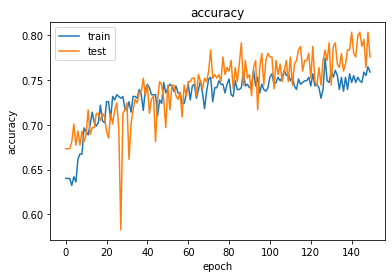

In [75]:
import matplotlib.pyplot as plt
print(history.history.keys())
#val_loss, val _accuracy loss, accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


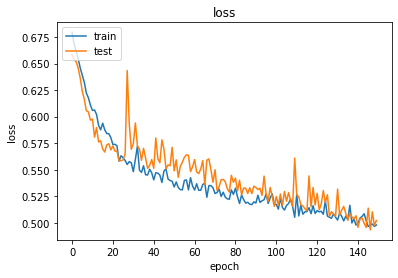

In [76]:
import matplotlib.pyplot as plt
print(history.history.keys())
#val_loss, val _accuracy loss, accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [77]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,Y = make_moons(noise =0.2,random_state = 0,n_samples =1000)  # x = 1000 x2
X=scale(X)
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size =.5)

In [78]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'binary classification')]

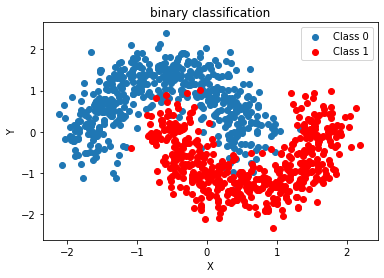

In [79]:
fig,ax = plt.subplots()
ax.scatter(X[Y==0,0],X[Y==0,1],label = 'Class 0')
ax.scatter(X[Y==1,0],X[Y==1,1],color ='r',label = 'Class 1')
ax.legend()
ax.set(xlabel ='X',ylabel ='Y',title = 'binary classification')

In [80]:
import keras

# 비선형 모델 

In [83]:
#비선형 모델 - 신경망 _ 분류 
model = Sequential()

#행렬 연산 => 설명을 확대 ( 변수가 32개로 늘어남  => 설명력이 늘어남)
#100x2  2x32 =64(가중치갯수)  1000 x 32
model.add(Dense(32,input_dim =2, activation = 'relu'))

#1000x32 32x1 = 1000x1
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'AdaDelta',loss = 'binary_crossentropy',
             metrics =['accuracy'])


#callback 함수는 window에서 마우스를 찍거나 하는 행위에서 자동으로 호출되는 함수이다
# tensorflow에서 callback은 이미지 직을 준비를 해라 라는 의미 
tb_callback = keras.callbacks.TensorBoard(log_dir ='./Graph/model_1/', #저장 루트
                                         histogram_freq = 100, write_graph = True, #
                                         write_images = False)
tb_callback.set_model(model)#콜백을 모델에 등록


In [84]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose= 0, validation_data = (X_test, Y_test), callbacks=[tb_callback])

InvalidArgumentError: You must feed a value for placeholder tensor 'dense_20_input' with dtype float and shape [?,2]
	 [[node dense_20_input (defined at C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\keras\backend\tensorflow_backend.py:736) ]]

Original stack trace for 'dense_20_input':
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\IPython\core\interactiveshell.py", line 3242, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-81-3b419e109eee>", line 6, in <module>
    model.add(Dense(32,input_dim =2, activation = 'relu'))
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\keras\engine\sequential.py", line 162, in add
    name=layer.name + '_input')
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\keras\engine\input_layer.py", line 178, in Input
    input_tensor=tensor)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\keras\engine\input_layer.py", line 87, in __init__
    name=self.name)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\keras\backend\tensorflow_backend.py", line 736, in placeholder
    shape=shape, ndim=ndim, dtype=dtype, sparse=sparse, name=name)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\keras\backend.py", line 998, in placeholder
    x = array_ops.placeholder(dtype, shape=shape, name=name)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2143, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6261, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [85]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6845313115119934
Test accuracy: 0.5879999995231628


In [86]:
keras.utils.print_summary(model)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [87]:
#model의 그래프 구조

keras.utils.plot_model(model)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [88]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [89]:
from IPython.display import Image,SVG
SVG(model_to_dot(model).create(prog='dpt',format='svg'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [90]:
model.summary()
#입력차수  
#변수개수 96 ( 가중치(2x32 + 32(bias) )

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


# mnist - callback

In [65]:
import keras
# Callback class
# Custum callback 함수 제작
# 함수에 의해서 호출되는 객체
class CustomHistory(keras.callbacks.Callback): # 상속
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self,batch, logs={}): # 오버라이딩
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

In [66]:
from keras.datasets import mnist
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


<function matplotlib.pyplot.show(*args, **kw)>

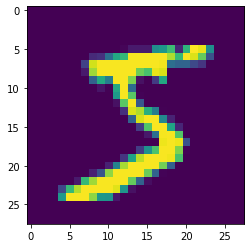

In [67]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show

In [68]:
X_train = X_train0.reshape(60000,784).astype('float32')/255.0
X_test = X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape, X_train.dtype) # 60000 * 784

(60000, 784) float32


In [69]:
y_train0[:5]
# one hot encoding 여부 : multi - label-> softmax
# 경우에 수에 대한 확률값

array([5, 0, 4, 1, 9], dtype=uint8)

In [70]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0,10)
Y_test = np_utils.to_categorical(y_test0,10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [71]:
from keras.optimizers import SGD
import numpy as np
np.random.seed(0)
model = Sequential()
# 60000 * 784
model.add(Dense(512, input_dim=784, activation='sigmoid'))
# 60000 * 15 / 15 *10 -> 60000*10
model.add(Dense(15))
model.add(Dense(10, activation='sigmoid'))
# lr : learning rate
# stochastic gradient descent
model.compile(optimizer=SGD(lr=0.2), loss='mse', metrics=['accuracy'])

In [72]:
model.layers

In [73]:
l1 = model.layers[0]
l2 = model.layers[1]
# 레이어 속성으로 정보확인
l1.name
l1.input_shape
l1.output_shape
l1.activation

<function keras.activations.sigmoid(x)>

In [74]:
custom_hist = CustomHistory()
custom_hist.init()
hist = model.fit(X_train,Y_train, nb_epoch=30, batch_size=100,validation_data=(X_test, Y_test),callbacks = [custom_hist], verbose=2)


C:\Users\ICT01_14\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 2s - loss: 0.0860 - accuracy: 0.3521 - val_loss: 0.0768 - val_accuracy: 0.5219
Epoch 2/30
 - 2s - loss: 0.0679 - accuracy: 0.6147 - val_loss: 0.0583 - val_accuracy: 0.7312
Epoch 3/30
 - 2s - loss: 0.0512 - accuracy: 0.7517 - val_loss: 0.0434 - val_accuracy: 0.7966
Epoch 4/30
 - 2s - loss: 0.0400 - accuracy: 0.8070 - val_loss: 0.0354 - val_accuracy: 0.8313
Epoch 5/30
 - 2s - loss: 0.0339 - accuracy: 0.8359 - val_loss: 0.0306 - val_accuracy: 0.8585
Epoch 6/30
 - 2s - loss: 0.0302 - accuracy: 0.8540 - val_loss: 0.0276 - val_accuracy: 0.8690
Epoch 7/30
 - 2s - loss: 0.0276 - accuracy: 0.8640 - val_loss: 0.0257 - val_accuracy: 0.8801
Epoch 8/30
 - 2s - loss: 0.0259 - accuracy: 0.8712 - val_loss: 0.0241 - val_accuracy: 0.8829
Epoch 9/30
 - 2s - loss: 0.0245 - accuracy: 0.8766 - val_loss: 0.0229 - val_accuracy: 0.8876
Epoch 10/30
 - 2s - loss: 0.0235 - accuracy: 0.8802 - val_loss: 0.0220 - val_accuracy: 0.8893
Epoch 11/30
 - 2s -

In [ ]:
plt.plot(hist.history['loss'])
plt.show()
hist.history

In [ ]:
plt.plot(hist.history['accuracy'], 'b-', label='Training')
plt.plot(hist.history['val_accuracy'], 'r:', label='test')
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history['accuracy'])
print(hist.history['val_accuracy'][29])
plt.show()
plt.plot(custom_hist.train_loss, 'y', label='train loss')
plt.show()

In [ ]:
model.predict(X_test[:1,:])


In [ ]:
# 문제 X_test의 이미지 한장의 label을 예측해보시오
model.predict(X_test[:1,:])

In [ ]:
model.predict_classes(X_test[:1,:], verbose=0)

# 보스턴집값예측

In [ ]:
# 보스턴집값예측
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [ ]:
num_faetures=13
model = Sequential()
model.add(Dense(1, input_dim=num_faetures, activation='linear'))

In [ ]:
model.summary()
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

In [ ]:
# mae
mse, mae = model.evaluate(x_test,y_test,verbose=False)
rmse= np.sqrt(mse)
mse,rmse,mae

In [ ]:
# 문제 : x_test의 3집을 예상하시오.
model.evaluate(x_test,y_test,verbose=False)

In [ ]:
pred = model.predict(x_test[:3,:])
real = y_test[:3]
print(model.predict(x_test[:3,:]))
print('실제집값 :', y_test[:3])

In [ ]:
pred =pred.reshape(3)

In [ ]:
import numpy as np
np.corrcoef(pred,real)